# EDA – api.csv
Este cuaderno realiza un análisis exploratorio centrado en nulos, duplicados, outliers y correlaciones.


In [ ]:
# ⚙️ Parámetros
FILE_PATH = r"..\data\input\api.csv"
OUTPUT_DIR = r"..\data\eda_outputs\api"
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)
print("Archivo:", FILE_PATH)
print("Salidas en:", OUTPUT_DIR)

Archivo: ..\data\input\api.csv
Salidas en: ..\data\eda_outputs\api


In [ ]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 150)


In [ ]:
# 1) Carga de datos
df = pd.read_csv(FILE_PATH, low_memory=False)
print(df.shape)
display(df.head(3))
df_sample = df.sample(min(len(df), 5), random_state=42)
display(df_sample)

(384, 14)


,DEPARTAMENTO_PRESTACION,MUNICIPIO_PRESTACION,SERVICIO,ESTADO,NOMBRE,DEPARTAMENTO_DOMICILIO,MUNICIPIO_DOMICILIO,DIRECCION,TELEFONO,EMAIL,TIPO_INSCRIPCION,REPRESENTANTE_LEGAL,TIPO_PRESTADOR,CLASIFICACION
0,"BOGOTA, D.C.","BOGOTA, D.C.",ACUEDUCTO,OPERATIVA,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,"BOGOTA, D.C.","BOGOTA, D.C.",Av Calle 24 No 37 - 15,3447000,lortega@acueducto.com.co,Registro por la ESP,CRISTINA ARANGO OLAYA,EMPRESA INDUSTRIAL Y COMERCIAL DEL ESTADO,MAYOR O IGUAL A 5001 USUARIOS
1,"BOGOTA, D.C.","BOGOTA, D.C.",ALCANTARILLADO,OPERATIVA,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,"BOGOTA, D.C.","BOGOTA, D.C.",Av Calle 24 No 37 - 15,3447000,lortega@acueducto.com.co,Registro por la ESP,CRISTINA ARANGO OLAYA,EMPRESA INDUSTRIAL Y COMERCIAL DEL ESTADO,MAYOR O IGUAL A 5001 USUARIOS
2,"BOGOTA, D.C.","BOGOTA, D.C.",ACUEDUCTO,OPERATIVA,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,"BOGOTA, D.C.","BOGOTA, D.C.",CALLE 95 A No 8-31 ESTE,5200713,acualcossec@hotmail.com,Registro por la ESP,MARISOL HERNANDEZ BUITRAGO,ORGANIZACION AUTORIZADA,MENOR O IGUAL A 2500 USUARIOS


,DEPARTAMENTO_PRESTACION,MUNICIPIO_PRESTACION,SERVICIO,ESTADO,NOMBRE,DEPARTAMENTO_DOMICILIO,MUNICIPIO_DOMICILIO,DIRECCION,TELEFONO,EMAIL,TIPO_INSCRIPCION,REPRESENTANTE_LEGAL,TIPO_PRESTADOR,CLASIFICACION
268,"BOGOTA, D.C.","BOGOTA, D.C.",ASEO,OPERATIVA,ASOCIACION DE RECUPERACION AMBIENTAL GO PLANET,"BOGOTA, D.C.","BOGOTA, D.C.",CRA 32 19A 20,2610080,operaciones.goplanet@gmail.com,Registro por la ESP,HUGO ANDRES VARGAS CAMARGO,ORGANIZACION AUTORIZADA,MAYOR O IGUAL A 5001 USUARIOS
250,"BOGOTA, D.C.","BOGOTA, D.C.",ASEO,OPERATIVA,CORPORACION CORPROAMBIENTE COLOMBIA,"BOGOTA, D.C.","BOGOTA, D.C.",CR 13 B BIS # 41 - 26 SUR,0,proambientecorporacion@gmail.com,Registro por la ESP,JORGE ANDERSON QUECAN GARCIA,ORGANIZACION AUTORIZADA,DESDE 2501 HASTA 5000 USUARIOS
355,"BOGOTA, D.C.","BOGOTA, D.C.",ASEO,OPERATIVA,ASOCIACION DE RECUPERACION ECOLOGICA VIDA VERDE,"BOGOTA, D.C.","BOGOTA, D.C.",CR 73C No 35c 60 sur,3112801,asociacion.asovivercm@gmail.com,Registro por la ESP,GERARDO SANTAMARIA CONTRERAS,ORGANIZACION AUTORIZADA,MAYOR O IGUAL A 5001 USUARIOS
332,"BOGOTA, D.C.","BOGOTA, D.C.",ASEO,OPERATIVA,ASOCIACION GESTION Y RECUPERACION ECOLOGICA,"BOGOTA, D.C.","BOGOTA, D.C.",CRA 26 N 22C - 36,4651337,ecorecsol@gmail.com,Registro por la ESP,KAREN JOHANNA SANMIGUEL RATIVA,ORGANIZACION AUTORIZADA,MAYOR O IGUAL A 5001 USUARIOS
56,"BOGOTA, D.C.","BOGOTA, D.C.",ASEO,OPERATIVA,ASOCIACIÓN DE RECUPERADORES MYM UNIVERSAL,"BOGOTA, D.C.","BOGOTA, D.C.",Carrera 18 # 164 - 32,6212020,info@mymuniversal.com,Registro por la ESP,JOSE EPAMINONDAS MALAGON PEREZ,ORGANIZACION AUTORIZADA,MAYOR O IGUAL A 5001 USUARIOS


In [ ]:
# 2) Estructura y tipos
display(df.info())
display(df.dtypes.value_counts())
desc = df.describe(include='all').T
desc.to_csv(f"{OUTPUT_DIR}/01_describe.csv")
desc.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DEPARTAMENTO_PRESTACION  384 non-null    object
 1   MUNICIPIO_PRESTACION     384 non-null    object
 2   SERVICIO                 384 non-null    object
 3   ESTADO                   384 non-null    object
 4   NOMBRE                   384 non-null    object
 5   DEPARTAMENTO_DOMICILIO   384 non-null    object
 6   MUNICIPIO_DOMICILIO      384 non-null    object
 7   DIRECCION                384 non-null    object
 8   TELEFONO                 384 non-null    int64 
 9   EMAIL                    384 non-null    object
 10  TIPO_INSCRIPCION         384 non-null    object
 11  REPRESENTANTE_LEGAL      384 non-null    object
 12  TIPO_PRESTADOR           374 non-null    object
 13  CLASIFICACION            374 non-null    object
dtypes: int64(1), object(13)
memory usage: 42.1

None

object    13
int64      1
Name: count, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DEPARTAMENTO_PRESTACION,384,1,"BOGOTA, D.C.",384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO_PRESTACION,384,1,"BOGOTA, D.C.",384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SERVICIO,384,3,ASEO,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,384,2,OPERATIVA,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOMBRE,384,380,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPARTAMENTO_DOMICILIO,384,9,"BOGOTA, D.C.",355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO_DOMICILIO,384,16,"BOGOTA, D.C.",355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIRECCION,384,380,Av Calle 24 No 37 - 15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TELEFONO,384.0,NaN,NaN,NaN,4554652.338542,2762390.247792,0.0,3005462.5,4583930.0,6793599.25,9999999.0
EMAIL,384,358,infosui@estrategia5.com,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 3) Nulos (conteo y porcentaje)
null_counts = df.isna().sum().sort_values(ascending=False)
null_pct = (df.isna().mean()*100).sort_values(ascending=False)
nulls_df = pd.DataFrame({"nulos": null_counts, "porcentaje": null_pct})
nulls_df.to_csv(f"{OUTPUT_DIR}/02_nulls.csv")
nulls_df.head(30)


,nulos,porcentaje
CLASIFICACION,10,2.604167
TIPO_PRESTADOR,10,2.604167
SERVICIO,0,0.000000
ESTADO,0,0.000000
DEPARTAMENTO_PRESTACION,0,0.000000
MUNICIPIO_PRESTACION,0,0.000000
DEPARTAMENTO_DOMICILIO,0,0.000000
NOMBRE,0,0.000000
MUNICIPIO_DOMICILIO,0,0.000000
DIRECCION,0,0.000000


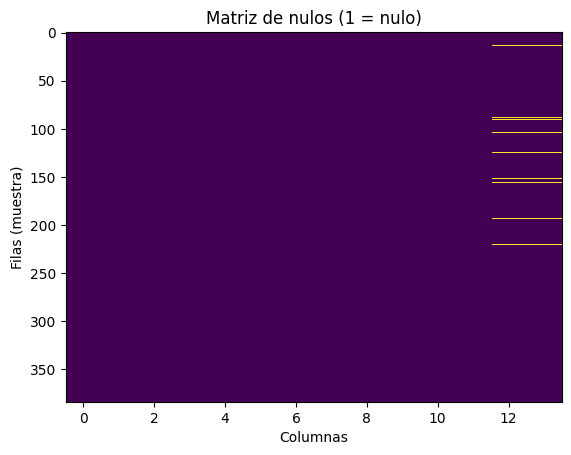

In [ ]:
# 3.1) Visualización de matriz de nulos (imshow)
import numpy as np
plt.figure()
# Usamos una muestra si el dataset es muy grande
max_rows = 2000
df_vis = df.iloc[:max_rows]
matrix = df_vis.isna().to_numpy()
plt.imshow(matrix, aspect='auto', interpolation='nearest')
plt.title("Matriz de nulos (1 = nulo)")
plt.xlabel("Columnas")
plt.ylabel("Filas (muestra)")
plt.savefig(f"{OUTPUT_DIR}/02_nulls_matrix.png", bbox_inches='tight')
plt.show()


In [ ]:
# 4) Duplicados
dup_count = int(df.duplicated().sum())
print("Duplicados exactos:", dup_count)
if dup_count > 0:
    dups = df[df.duplicated()].head(5)
    dups.to_csv(f"{OUTPUT_DIR}/03_duplicados_ejemplo.csv", index=False)


Duplicados exactos: 0


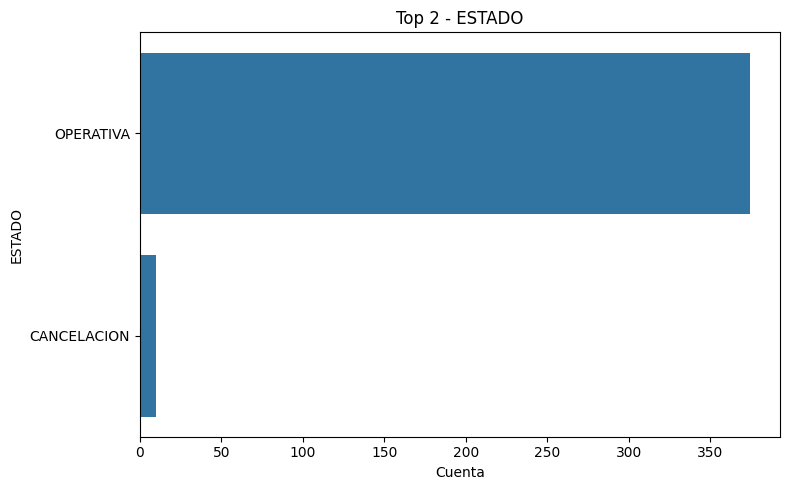

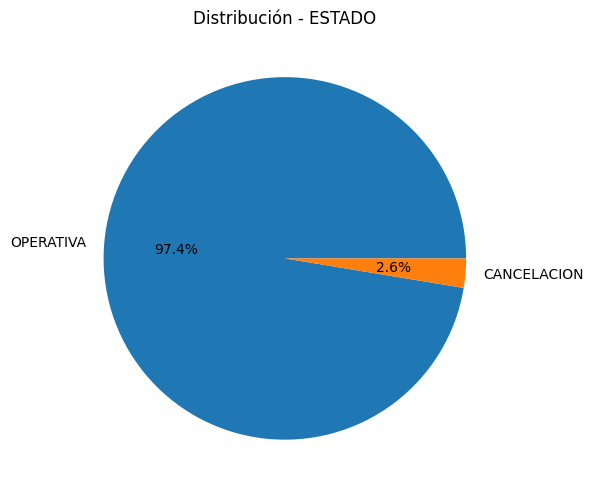

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10280\2689252375.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


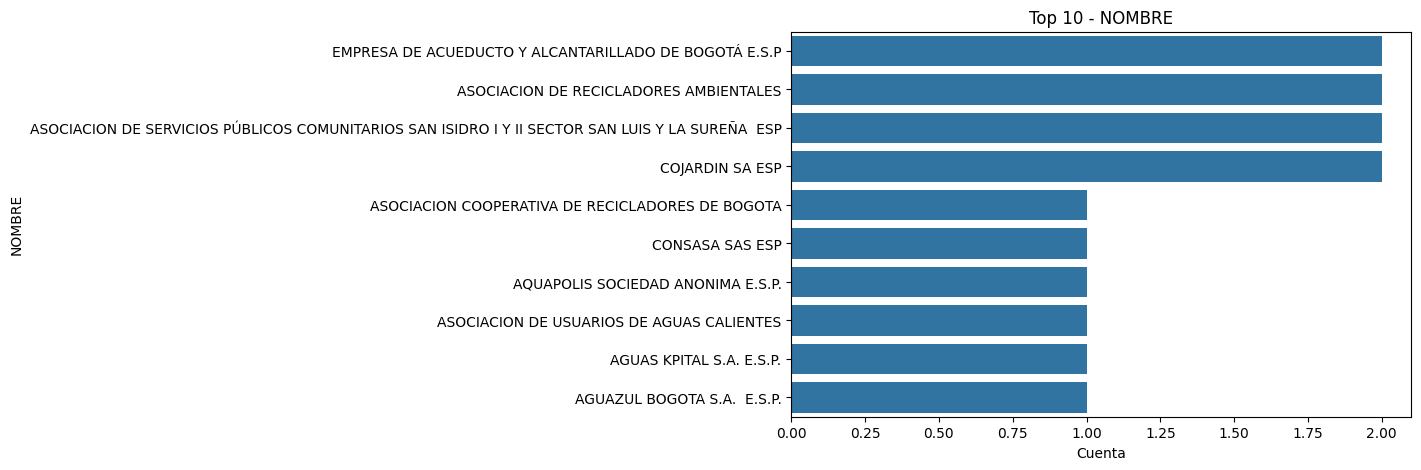

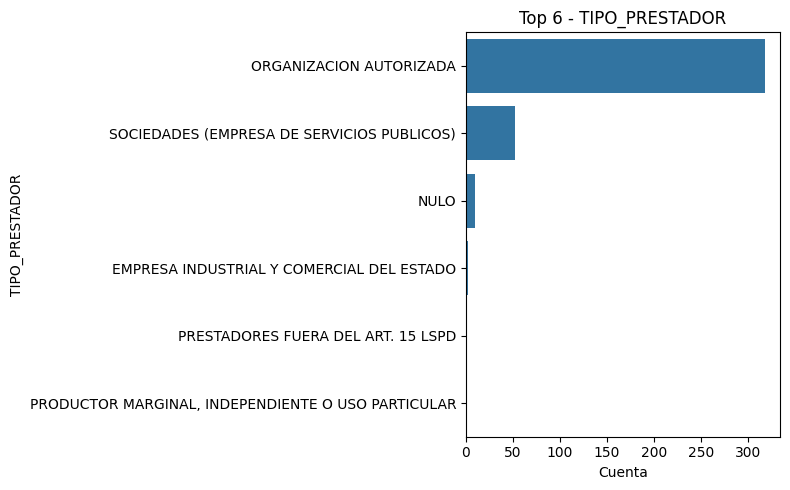

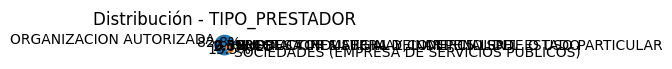

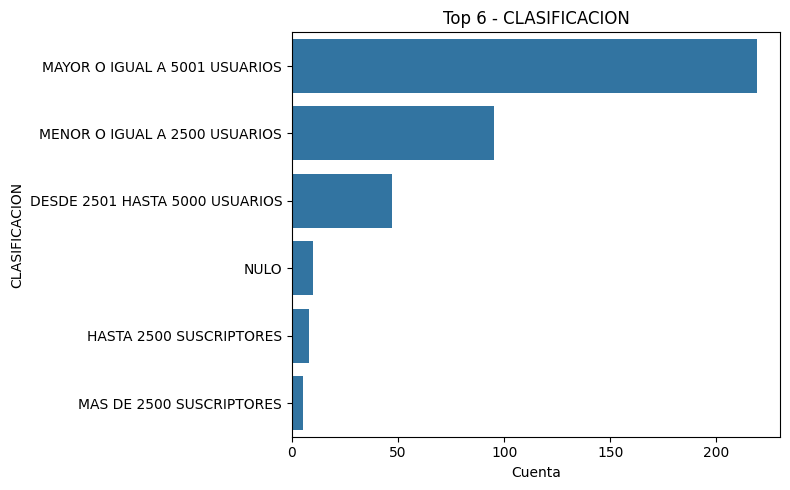

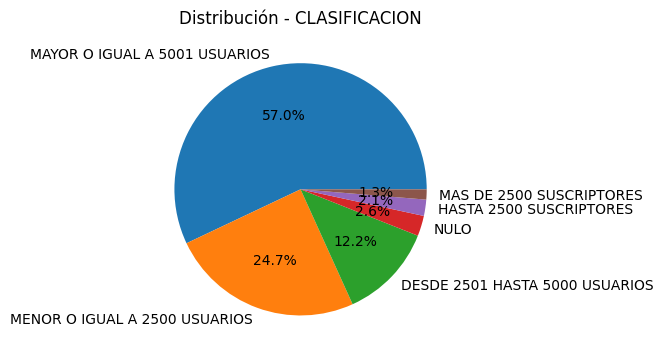

,columna,n_nulos,n_unique
1,NOMBRE,0,380
2,TIPO_PRESTADOR,10,5
3,CLASIFICACION,10,5
0,ESTADO,0,2


In [ ]:
# 5) Categóricas filtradas (sin TELEFONO y SIN mapa de nulos)
import seaborn as sns
os.makedirs(OUTPUT_DIR, exist_ok=True)

def _norm(s: str) -> str:
    return str(s).strip().upper().replace("__", "_").replace("  ", " ")

EXCLUDE_EXACT = {
    "DEPARTAMENTO_PRESTACION",
    "MUNICIPIO_PRESTACION",
    "SERVICIO",
    "DEPARTAMENTO_DOMICILIO",   # <- excluida
    "MUNICIPIO_DOMICILIO",      # <- excluida
    "DIRECCION",
    "EMAIL",
    "TIPO_INSCRIPCION",
    "REPRESENTANTE_LEGAL",
    "TELEFONO",
}
EXCLUDE_PATTERNS = ("DEPARTAMENTO", "MUNICIPIO", "DIRECCION", "EMAIL")

all_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()

cat_cols = []
for c in all_cat:
    cn = _norm(c)
    if cn in EXCLUDE_EXACT:
        continue
    if any(pat in cn for pat in EXCLUDE_PATTERNS):
        continue
    if cn == "TELEFONO" or "TELEFONO" in cn:
        continue
    cat_cols.append(c)

if not cat_cols:
    print("No hay columnas categóricas para graficar después de filtrar.")
else:
    for col in cat_cols:
        series = df[col].fillna("NULO").astype(str)
        vc = series.value_counts().head(10)

        # Barplot horizontal (top 10)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=vc.values, y=vc.index)
        plt.title(f"Top {min(10, len(vc))} - {col}")
        plt.xlabel("Cuenta")
        plt.ylabel(col)
        plt.tight_layout()
        plt.savefig(f"{OUTPUT_DIR}/05_bar_{_norm(col)}.png", bbox_inches="tight")
        plt.show()

        # Pie si pocas categorías
        if series.nunique(dropna=False) <= 6:
            plt.figure(figsize=(6, 6))
            series.value_counts().plot.pie(autopct="%1.1f%%", ylabel="")
            plt.title(f"Distribución - {col}")
            plt.tight_layout()
            plt.savefig(f"{OUTPUT_DIR}/05_pie_{_norm(col)}.png", bbox_inches="tight")
            plt.show()

# (Sin heatmap de nulos)
summary = pd.DataFrame([
    {"columna": c, "n_nulos": int(df[c].isna().sum()), "n_unique": int(df[c].nunique(dropna=True))}
    for c in cat_cols
]).sort_values("n_unique", ascending=False)
summary.to_csv(f"{OUTPUT_DIR}/05_cat_summary_filtrado.csv", index=False)
display(summary)


In [ ]:
# 7) Categóricas (conteos top-20)
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categóricas:", len(cat_cols))
cat_summary = {}
for col in cat_cols:
    vc = df[col].astype(str).value_counts(dropna=False).head(20)
    cat_summary[col] = vc
    vc.to_csv(f"{OUTPUT_DIR}/07_top20_{col}.csv")
list(cat_summary.keys())[:10]


Categóricas: 13


['DEPARTAMENTO_PRESTACION',
 'MUNICIPIO_PRESTACION',
 'SERVICIO',
 'ESTADO',
 'NOMBRE',
 'DEPARTAMENTO_DOMICILIO',
 'MUNICIPIO_DOMICILIO',
 'DIRECCION',
 'EMAIL',
 'TIPO_INSCRIPCION']

In [ ]:
# 9) Dimensiones de calidad (resumen)
rows = []
for col in df.columns:
    s = df[col]
    n = len(s)
    n_null = int(s.isna().sum())
    pct_null = (n_null / n) * 100 if n else 0
    dtype = str(s.dtype)
    uniques = int(s.nunique(dropna=True))
    is_num = pd.api.types.is_numeric_dtype(s)
    # Validez simple (reglas genéricas; ajusta si tienes reglas de negocio)
    valid = True
    if is_num:
        # ejemplo: números infinitos o absurdos
        if np.isinf(s.replace([np.inf, -np.inf], np.nan).dropna().to_numpy()).any():
            valid = False
    rows.append({
        "columna": col,
        "tipo": dtype,
        "n": n,
        "nulos": n_null,
        "pct_nulos": round(pct_null, 2),
        "unicos": uniques,
        "es_numerica": bool(is_num),
        "validez_simple": valid
    })
dq_df = pd.DataFrame(rows).sort_values(["pct_nulos","columna"], ascending=[False,True])
dq_df.to_csv(f"{OUTPUT_DIR}/09_data_quality_dimensions.csv", index=False)
dq_df.head(30)


,columna,tipo,n,nulos,pct_nulos,unicos,es_numerica,validez_simple
13,CLASIFICACION,object,384,10,2.6,5,False,True
12,TIPO_PRESTADOR,object,384,10,2.6,5,False,True
5,DEPARTAMENTO_DOMICILIO,object,384,0,0.0,9,False,True
0,DEPARTAMENTO_PRESTACION,object,384,0,0.0,1,False,True
7,DIRECCION,object,384,0,0.0,380,False,True
9,EMAIL,object,384,0,0.0,358,False,True
3,ESTADO,object,384,0,0.0,2,False,True
6,MUNICIPIO_DOMICILIO,object,384,0,0.0,16,False,True
1,MUNICIPIO_PRESTACION,object,384,0,0.0,1,False,True
4,NOMBRE,object,384,0,0.0,380,False,True
